# Data Analysis

### 1. Upload dataset from local files

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Capstone/Dataset454
!ls

/content/drive/MyDrive/Capstone/Dataset454
test  train  valid


### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import cv2
import numpy as np
import sys
from scipy.ndimage import interpolation as inter
import math
import pickle

### 2. Check Image Dimensions

In [ ]:
subfolders = os.listdir()
print(subfolders)

['valid', 'test', 'train']


In [ ]:
same_dimensions = True
dataset_size = 0
classes_dict = {key: 0 for key in range(1, 455)}
print(classes_dict)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 0, 139

In [ ]:
for folder in subfolders: #Iterating through validation, training and testing folders
  subfolder = os.listdir(folder)
  i = 0
  for subf in subfolder:  #Iterating through class folder
    i += 1
    curr_class = int(subf)
    subfolder_path = os.path.join(folder, subf)
    images = os.listdir(subfolder_path)
    for img in images:    #Iterating through images in class folders
      classes_dict[curr_class] += 1
      img_path = os.path.join(subfolder_path, img)
      dim = None
      # img = Image.open(img_path)
      # dimensions = img.size
      dataset_size += 1
      # if dim is None:
      #   dim = dimensions
      #   # print(dimens ions)
      # else:
      #   if dim != dimensions:
      #     same_dimensions = False
      #     print(dim, dimensions)

if same_dimensions:
  print(f"All images in the dataset are the same dimensions: {dim}")
  print(f"Dataset size: {dataset_size}")
else:
  print("Images in the dataset are not all of the same dimensions")

All images in the dataset are the same dimensions: None
Dataset size: 108933


### 3. Class Distributions

In [ ]:
class_freq_df = pd.DataFrame(list(classes_dict.items()), columns = ['Class', 'Frequency'])
class_freq_df

,Class,Frequency
0,1,240
1,2,240
2,3,240
3,4,240
4,5,240
...,...,...
449,450,240
450,451,240
451,452,240
452,453,240


In [ ]:
minkey = min(classes_dict, key=classes_dict.get)
print(f"Min frequency class: {minkey}: {classes_dict[minkey]}")

Min frequency class: 187: 203


In [ ]:
print("Classes that do not have exactly 240 images:")
for key, val in classes_dict.items():
  if val != 240:
    print(f"Class {key}:{val}")
    print(f"Class {key}:{val}")

Class 21:239
Class 28:242
Class 70:244
Class 122:238
Class 134:238
Class 146:237
Class 149:239
Class 159:233
Class 163:239
Class 167:245
Class 168:247
Class 169:243
Class 170:243
Class 187:203
Class 188:246
Class 204:241
Class 246:236
Class 256:239
Class 269:241
Class 270:239
Class 410:241


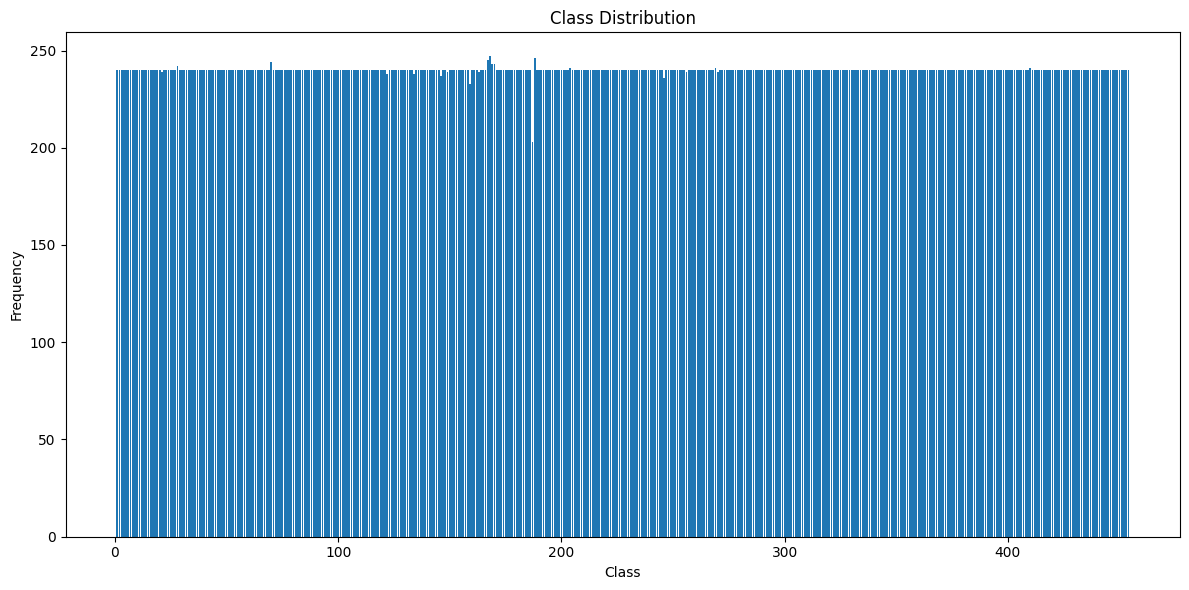

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(class_freq_df['Class'], class_freq_df['Frequency'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

In [ ]:
imbalance = max(classes_dict.values()) / min(classes_dict.values())
print("Class imbalance ratio: " + str(imbalance))

Class imbalance ratio: 1.2167487684729064


### 4. Data Visualization

#### Loading training data into np arrays

In [ ]:
%cd /content/drive/MyDrive/Capstone/Dataset454/train

/content/drive/MyDrive/Capstone/Dataset454/train


In [ ]:
data = []
labels = []

def addImgToData(img_path, class_folder):
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  image_np = np.asarray(image)
  data.append(image_np)
  labels.append(int(class_folder))

class_folders = os.listdir()
for folder in class_folders:
  images = os.listdir(folder)
  image_paths = [os.path.join(folder, img) for img in images]
  for path in image_paths:
    addImgToData(path, folder)

labels = np.array(labels, dtype=object)

In [ ]:
training_labels = np.copy(labels)
train_data = np.array(data, dtype=object)
print(train_data[2196].shape)
print(training_labels[0])

(86, 80)
136


In [ ]:
print(min(training_labels))

1


#### Loading testing data into np arrays

In [ ]:
%cd /content/drive/MyDrive/Capstone/Dataset454/test

/content/drive/MyDrive/Capstone/Dataset454/test


In [ ]:
data = []
labels = []

class_folders = os.listdir()
for folder in class_folders:
  images = os.listdir(folder)
  image_paths = [os.path.join(folder, img) for img in images]
  for path in image_paths:
    # addImgToData(path, folder)
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image_np = np.asarray(image)
    data.append(image_np)
    labels.append(int(folder))

original_testing_data = np.array(data, dtype=object)
original_testing_labels = np.copy(labels)
print(original_testing_data[0].shape)
print(original_testing_labels)

KeyboardInterrupt: ignored

In [ ]:
print(len(testing_labels))

10896


#### Loading validation data into np arrays

In [ ]:
%cd /content/drive/MyDrive/Capstone/Dataset454/valid

/content/drive/MyDrive/Capstone/Dataset454/valid


In [ ]:
data = []
labels = []

class_folders = os.listdir()
for folder in class_folders:
  images = os.listdir(folder)
  image_paths = [os.path.join(folder, img) for img in images]
  for path in image_paths:
    addImgToData(path, folder)

validation_data = np.array(data, dtype=object)
validation_labels = np.copy(labels)
print(validation_data[0].shape)
print(validation_labels[0])

(80, 80)
123


In [ ]:
print(len(validation_labels))

10896


### Dump and save training, testing and validation data and labels

In [ ]:
%cd /content/drive/MyDrive/Capstone

/content/drive/MyDrive/Capstone


In [ ]:
train_data[2196] = cv2.resize(train_data[2196], (80,80), interpolation=cv2.INTER_AREA)
train_data[2196].shape

(80, 80)

In [ ]:
# output = open('training_data.pkl', 'wb')
# pickle.dump(train_data, output)

# output = open('training_labels.pkl', 'wb')
# pickle.dump(training_labels, output)

# output = open('testing_data.pkl', 'wb')
# pickle.dump(testing_data, output)

# output = open('testing_labels.pkl', 'wb')
# pickle.dump(testing_labels, output)

# output = open('validation_data.pkl', 'wb')
# pickle.dump(validation_data, output)

# output = open('validation_labels.pkl', 'wb')
# pickle.dump(validation_labels, output)

with open('training_data.pkl', 'wb') as output:
    pickle.dump(train_data, output)

with open('training_labels.pkl', 'wb') as output:
    pickle.dump(training_labels, output)

with open('testing_data.pkl', 'wb') as output:
    pickle.dump(testing_data, output)

with open('testing_labels.pkl', 'wb') as output:
    pickle.dump(testing_labels, output)

# with open('validation_data.pkl', 'wb') as output:
#     pickle.dump(validation_data, output)

# with open('validation_labels.pkl', 'wb') as output:
#     pickle.dump(validation_labels, output)

### Loading the arrays from Pickle

In [ ]:
del original_testing_data
del original_testing_labels

In [ ]:
%cd /content/drive/MyDrive/Capstone

/content/drive/MyDrive/Capstone


In [ ]:
with open('training_data.pkl', 'rb') as output:
    train_data = pickle.load(output)

with open('training_labels.pkl', 'rb') as output:
    training_labels = pickle.load(output)

with open('testing_data.pkl', 'rb') as output:
    original_testing_data = pickle.load(output)

with open('testing_labels.pkl', 'rb') as output:
    original_testing_labels = pickle.load(output)

# with open('validation_data.pkl', 'rb') as output:
#     validation_data = pickle.load(output)

# with open('validation_labels.pkl', 'rb') as output:
#     validation_labels = pickle.load(output)

In [ ]:
testing_data = np.asarray(original_testing_data).astype('float32')
testing_labels = np.asarray(original_testing_labels).astype('int32')

#### Visualization

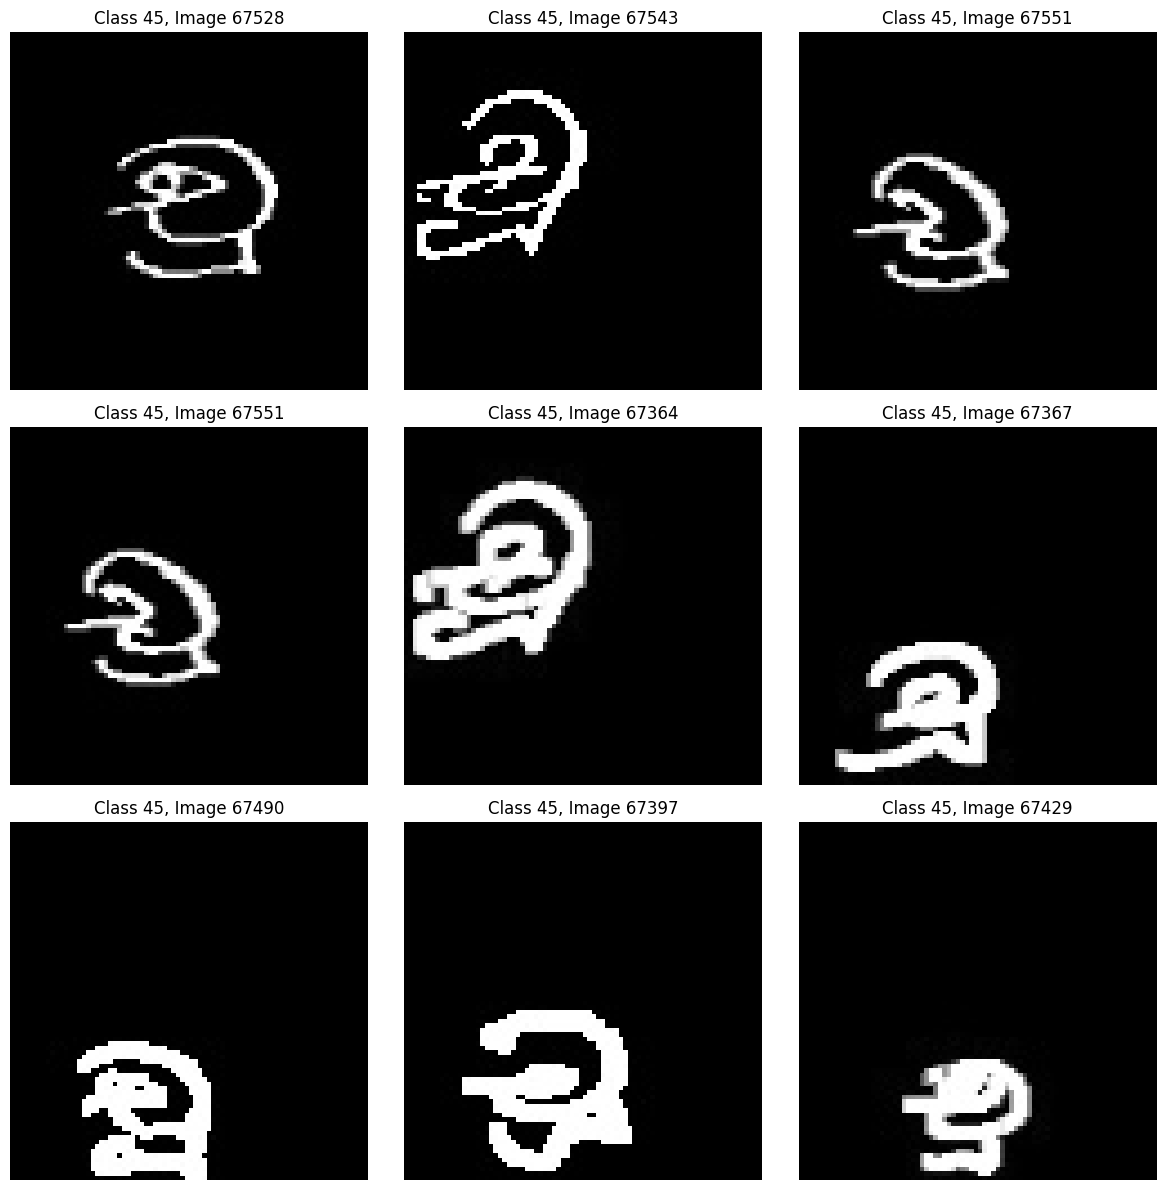

In [ ]:
#Function to display a given number of samples from a given class numbers from a dataset

def displayClassSamples(dataset, displayed_classes, samples_per_class):
  num_displayed_classes = len(displayed_classes)


  rows = num_displayed_classes
  cols = samples_per_class

  figs, axes = plt.subplots(rows, cols, figsize=(12,12))

  for class_i, class_idx in enumerate(displayed_classes):
    class_indices = np.where(labels == str(class_idx))[0]
    selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)

    for i, idx in enumerate(selected_indices):
      ax = axes[class_i, i]
      image = dataset[idx]
      ax.imshow(image, cmap='gray')
      ax.set_title(f'Class {class_idx}, Image {idx }')
      ax.axis('off')

  plt.tight_layout()
  plt.show()

displayed_classes = [45,45,45]
samples_per_class = 3
displayClassSamples(train_data, displayed_classes, samples_per_class)

### 5. Pixel value distribution

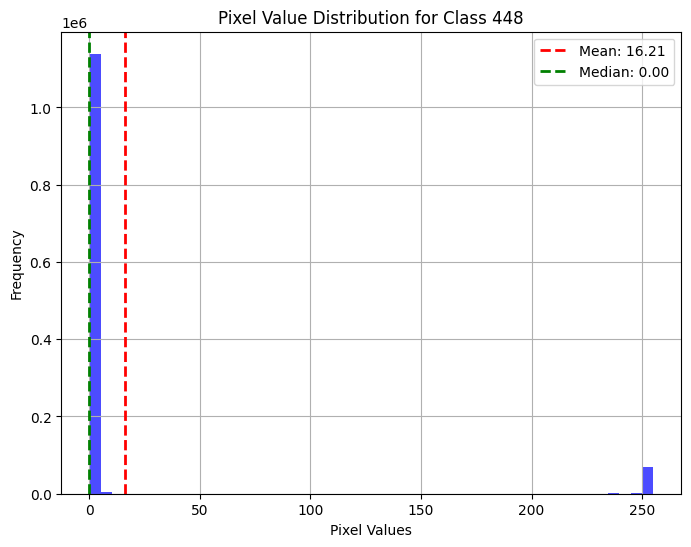

Class 448 Statistics:
Mean: 16.21
Median: 0.00
Standard Deviation: 60.59
25th Percentile: 0.00
50th Percentile (Median): 0.00
75th Percentile: 0.00


In [ ]:
class_num = 448

class_indices = np.where(labels == str(class_num))[0]
class_data = np.empty(0)
for index in class_indices:
  image_pixels = train_data[index].flatten()
  class_data = np.concatenate((class_data, image_pixels))

mean = np.mean(class_data)
median = np.median(class_data.tolist(), axis=0)
std = np.std(class_data)
percentiles = np.percentile(class_data.tolist(), [25, 50, 75])

plt.figure(figsize=(8, 6))
plt.hist(class_data, bins=50, color='blue', alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title(f'Pixel Value Distribution for Class {class_num}')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Class {class_num} Statistics:")
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"25th Percentile: {percentiles[0]:.2f}")
print(f"50th Percentile (Median): {percentiles[1]:.2f}")
print(f"75th Percentile: {percentiles[2]:.2f}")

# Preprocessing

### 1. Binarization

#### Binarizing images using cv2 with threshold of 128

In [ ]:
target_shape = (80, 80)


# Training set
# binarized_train_data = []
# for img in train_data:
#   img = img.astype(np.uint8)
#   th, binarized_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
#   binarized_image_np = np.asarray(binarized_image)
#   binarized_train_data.append(binarized_image_np)
# train_data = np.array(binarized_train_data, dtype=object)
# del binarized_train_data

binarized_train_data = []
for img in train_data:
    img = img.astype(np.uint8)
    th, binarized_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    resized_image = cv2.resize(binarized_image, target_shape)
    binarized_image_float32 = resized_image.astype(np.float32)
    binarized_train_data.append(binarized_image_float32)
train_data = np.array(binarized_train_data, dtype=np.float32)
del binarized_train_data


# Testing set
# binarized_test_data = []
# for img in testing_data:
#   img = img.astype(np.uint8)
#   th, binarized_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
#   binarized_image_np = np.asarray(binarized_image)
#   binarized_test_data.append(binarized_image_np)
# testing_data = np.array(binarized_test_data, dtype=object)
# del binarized_test_data

binarized_test_data = []
for img in testing_data:
    img = img.astype(np.uint8)
    th, binarized_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    resized_image = cv2.resize(binarized_image, target_shape)
    binarized_image_float32 = resized_image.astype(np.float32)
    binarized_test_data.append(binarized_image_float32)
testing_data = np.array(binarized_test_data, dtype=np.float32)
del binarized_test_data


# Validation set
# binarized_val_data = []
# for img in validation_data:
#   img = img.astype(np.uint8)
#   th, binarized_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
#   binarized_image_np = np.asarray(binarized_image)
#   binarized_val_data.append(binarized_image_np)
# validation_data = np.array(binarized_val_data, dtype=object)
# del binarized_val_data

### Plot

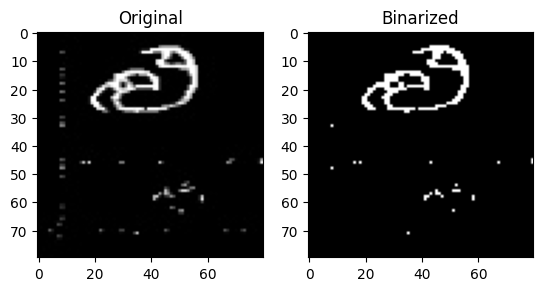

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(train_data[67000], cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(binarized_train_data[67000], cmap='gray')
plt.title("Binarized")

plt.show()

### 2. Thinning and Skeletonization

#### Using Zhang-Suen algorithm for thinning and morphological operations for skeletonization

In [ ]:
thin_skel_data = []
for img in train_data:
  img = img.astype(np.uint8)
  thin_img = cv2.ximgproc.thinning(img)
  thinned_skeleton = cv2.ximgproc.thinning(thin_img, thinningType=cv2.ximgproc.THINNING_GUOHALL)
  thin_skel_np = np.asarray(thinned_skeleton, dtype=np.float32)
  thin_skel_data.append(thin_skel_np)
train_data = np.array(thin_skel_data, dtype=np.float32)
del thin_skel_data


thin_skel_test_data = []
for img in testing_data:
  img = img.astype(np.uint8)
  thin_img = cv2.ximgproc.thinning(img)
  thinned_skeleton = cv2.ximgproc.thinning(thin_img, thinningType=cv2.ximgproc.THINNING_GUOHALL)
  thin_skel_np = np.asarray(thinned_skeleton, dtype=np.float32)
  thin_skel_test_data.append(thin_skel_np)
testing_data = np.array(thin_skel_test_data, dtype=np.float32)
del thin_skel_test_data

# thin_skel_val_data = []
# for img in validation_data:
#   img = img.astype(np.uint8)
#   thin_img = cv2.ximgproc.thinning(img)
#   thinned_skeleton = cv2.ximgproc.thinning(thin_img, thinningType=cv2.ximgproc.THINNING_GUOHALL)
#   thin_skel_np = np.asarray(thinned_skeleton)

#   thin_skel_val_data.append(thin_skel_np)
# validation_data = np.array(thin_skel_val_data, dtype=object)
# del thin_skel_val_data

### Plot

NameError: ignored

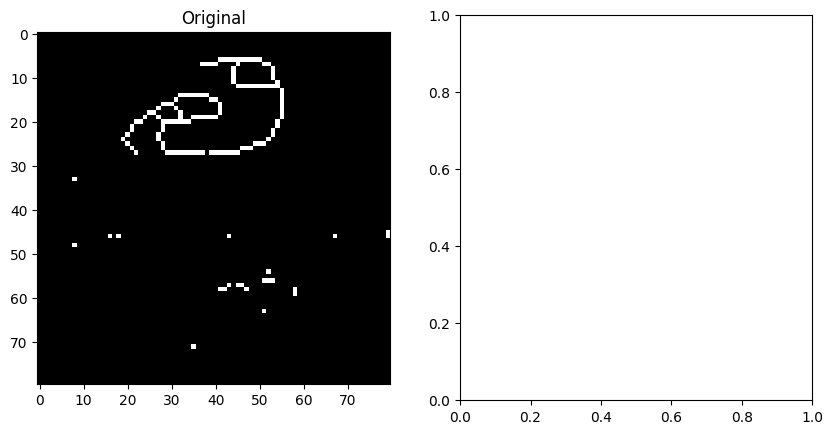

In [ ]:
plt.figure(figsize=(10, 5))

index = 67000

# First plot
plt.subplot(1, 2, 1)
plt.imshow(train_data[67000], cmap='gray')
plt.title("Original")

# Last plot
plt.subplot(1, 2, 2)
plt.imshow(thin_skel_data[67000], cmap='gray')
plt.title("Thinned & Skeleton")

plt.tight_layout(w_pad=0.1)
plt.show()

### 3. Contour Detection and Centering

### Contour Filtering

### Plot

In [ ]:
img = train_data[67000]
original = img.copy()
plt.figure(figsize=(15, 5))

# GET CONTOURS
contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

# AREA THRESHOLD
total_image_area = 80 * 80
minimum_area_threshold = 0.002 * total_image_area   # 2% threshold
print(f"Min area threshold: {minimum_area_threshold}\n")

# PLOT ALL CONTOURS
plt.subplot(1,3,1)
plt.title("All Contours")
plt.axis('off')
all_contours = img.copy()
for ctn in contours:
  x, y, w, h = cv2.boundingRect(ctn)
  all_contours = cv2.cvtColor(all_contours, cv2.COLOR_BGR2RGB)
  all_contours = cv2.rectangle(all_contours, (x, y), (x+w, y+h), (0, 255, 0), 1)
plt.imshow(all_contours)

#FILTER CONTOURS USING THRESHOLD
filtered_contours = []
for ctn in contours:
  x, y, w, h = cv2.boundingRect(ctn)
  area = w*h
  if area > minimum_area_threshold:
    filtered_contours.append(ctn)

print(f"Number of filtered contours: {len(filtered_contours)}\n")

if filtered_contours:

  # PLOT FILTERED CONTOURS
  filt_contours = img.copy()
  x1, x2 = math.inf, 0
  y1, y2 = math.inf, 0
  for ctn in filtered_contours:
    x, y, w, h = cv2.boundingRect(ctn)
    x1 = min(x1, x)
    x2 = max(x2, x + w)
    y1 = min(y1, y)
    y2 = max(y2, y + h)
    filt_contours = cv2.cvtColor(filt_contours, cv2.COLOR_BGR2RGB)
    filt_contours = cv2.rectangle(filt_contours, (x, y), (x+w, y+h), (0, 255, 0), 1)
  big_bounding_box = img.copy()
  big_bounding_box = cv2.cvtColor(big_bounding_box, cv2.COLOR_BGR2RGB)
  big_bounding_box = cv2.rectangle(big_bounding_box, (x1, y1), (x2, y2), (0, 255, 0), 1)

  plt.subplot(1,3,2)
  plt.title("Filtered Contours")
  plt.imshow(filt_contours)
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.title("Big Bounding Box")
  plt.imshow(big_bounding_box)
  plt.axis('off')
  plt.show()

error: ignored

<Figure size 1500x500 with 0 Axes>

### Filter and Center Function

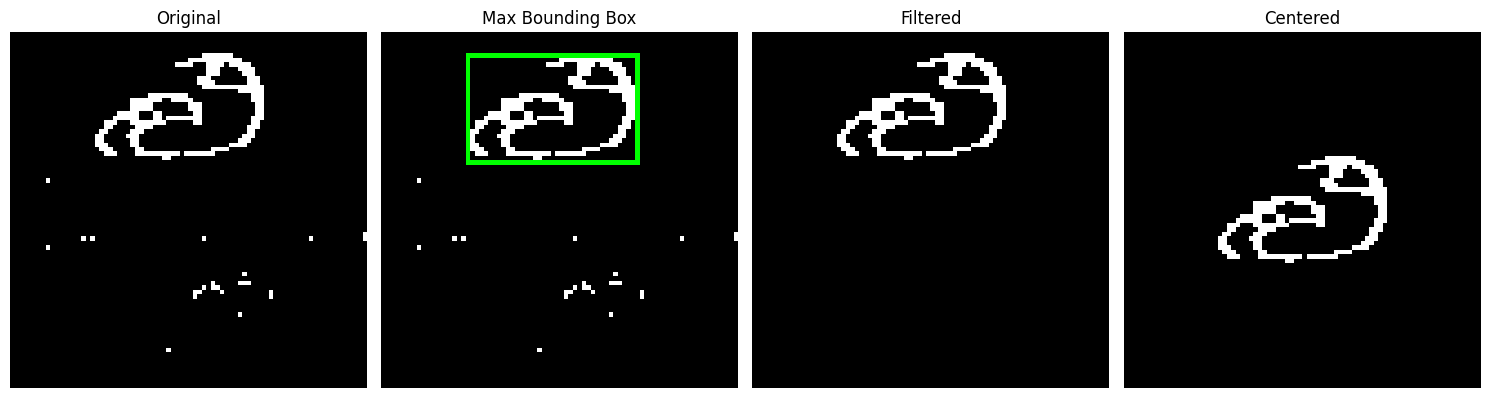

In [ ]:
img = train_data[67000]
original = img.copy()

def filter_and_center(img):
  if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = np.uint8(img)

  # GET CONTOURS
  contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # AREA THRESHOLD
  total_image_area = 80 * 80
  minimum_area_threshold = 0.002 * total_image_area   # 2% threshold

  # PLOT ALL CONTOURS
  all_contours = img.copy()
  for ctn in contours:
    x, y, w, h = cv2.boundingRect(ctn)
    all_contours = cv2.cvtColor(all_contours, cv2.COLOR_BGR2RGB)
    all_contours = cv2.rectangle(all_contours, (x, y), (x+w, y+h), (0, 255, 0), 1)

  #FILTER CONTOURS USING THRESHOLD
  result = img.copy()
  filtered_contours = []
  for ctn in contours:
    x, y, w, h = cv2.boundingRect(ctn)
    area = w*h
    if area > minimum_area_threshold:
      filtered_contours.append(ctn)
    else:
      # REMOVE FILTERED OUT CONTOURS
      result[y:y+h, x:x+w] = 0

  if filtered_contours:

    # PLOT FILTERED CONTOURS
    filt_contours = img.copy()
    x1, x2 = math.inf, 0
    y1, y2 = math.inf, 0
    for ctn in filtered_contours:
      x, y, w, h = cv2.boundingRect(ctn)
      x1 = min(x1, x)
      x2 = max(x2, x + w)
      y1 = min(y1, y)
      y2 = max(y2, y + h)
      filt_contours = cv2.cvtColor(filt_contours, cv2.COLOR_BGR2RGB)
      filt_contours = cv2.rectangle(filt_contours, (x, y), (x+w, y+h), (0, 255, 0), 1)
    big_bounding_box = img.copy()
    big_bounding_box = cv2.cvtColor(big_bounding_box, cv2.COLOR_BGR2RGB)
    big_bounding_box = cv2.rectangle(big_bounding_box, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # CENTER THE IMAGE USING MAX BOUNDING BOX
    char_center_x = x1 + (x2 - x1)/2
    char_center_y = y1 + (y2 - y1)/2

    target_center_x, target_center_y = 40, 40

    tx = target_center_x - char_center_x
    ty = target_center_y - char_center_y

    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    centered = cv2.warpAffine(result, translation_matrix, (80, 80), flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    return big_bounding_box, result, centered
  else:
    return [0], [0], [0]
    print("returned 0")


bounding_box, filtered, centered = filter_and_center(img)

# PLOT ORIGINAL, MAX BOUNDING BOX, FILTERED OUT IMAGE
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ["Original", "Max Bounding Box", "Filtered", "Centered"]

images = [original, bounding_box, filtered, centered]

for i, ax in enumerate(axes):
    ax.set_title(titles[i])
    if i == 1:
      ax.imshow(images[i])
    else:
      ax.imshow(images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Filter and center dataset

In [ ]:
centered_data = []
for img in train_data:
  img = img.astype(np.uint8)
  bounding_box, filtered, centered = filter_and_center(img)
  centered_np = np.asarray(centered, dtype=np.float32)
  centered_resized = cv2.resize(centered_np, (80, 80), interpolation=cv2.INTER_NEAREST)
  centered_data.append(centered_resized)
train_data = np.array(centered_data, dtype=np.float32)
del centered_data

centered_test_data = []
for img in testing_data:
  img = img.astype(np.uint8)
  bounding_box, filtered, centered = filter_and_center(img)
  centered_np = np.asarray(centered, dtype=np.float32)
  centered_resized = cv2.resize(centered_np, (80, 80), interpolation=cv2.INTER_NEAREST)
  centered_test_data.append(centered_resized)
testing_data = np.array(centered_test_data, dtype=np.float32)
del centered_test_data

# centered_val_data = []
# for img in validation_data:
#   img = img.astype(np.uint8)
#   bounding_box, filtered, centered = filter_and_center(img)
#   centered_np = np.asarray(centered)
#   centered_val_data.append(centered_np)
# validation_data = np.array(centered_val_data, dtype=object)
# del centered_val_data

### Plot

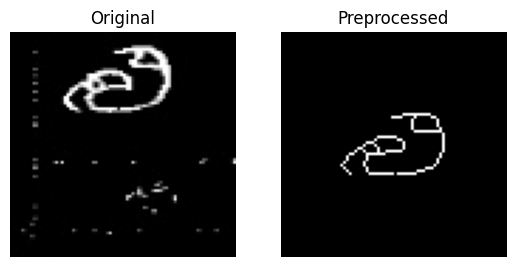

In [ ]:
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(train_data[67000], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Preprocessed")
plt.imshow(centered_data[67000], cmap='gray')
plt.axis('off')
plt.show()

## 4. Normalization

In [ ]:
normalized_train_data = []
for img in train_data:
  normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  normalized_train_data.append(normalized)
train_data = np.array(normalized_train_data, dtype=np.float32)
del normalized_train_data

normalized_test_data = []
for img in testing_data:
  normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  normalized_test_data.append(normalized)
testing_data = np.array(normalized_test_data, dtype=np.float32)
del normalized_test_data

# normalized_val_data = []
# for img in validation_data:
#   normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#   normalized_np = np.asarray(normalized)
#   normalized_val_data.append(normalized_np)
# validation_data = np.array(normalized_val_data, dtype=object)
# del normalized_val_data

In [ ]:
print(np.amax(train_data[67000]))

1.0


In [ ]:
mask = [img.shape == (80, 80) for img in train_data]
train_data = train_data[mask]
training_labels = training_labels[mask]
del mask

In [ ]:
mask = [img.shape == (80, 80) for img in testing_data]
testing_data = testing_data[mask]
testing_labels = testing_labels[mask]
del mask

In [ ]:
train_data = np.asarray(train_data).astype('float32')
training_labels = np.asarray(training_labels).astype('int32')
testing_data = np.asarray(testing_data).astype('float32')
testing_labels = np.asarray(testing_labels).astype('int32')

In [ ]:
train_data = train_data.reshape(-1, 80, 80, 1)
testing_data = testing_data.reshape(-1, 80, 80, 1)

## 5. Save Preprocessed Data Arrays

In [ ]:
%cd /content/drive/MyDrive/Capstone/preprocessednothin

/content/drive/MyDrive/Capstone/preprocessednothin


In [ ]:
with open('training_data.pkl', 'wb') as output:
    pickle.dump(train_data, output)

with open('training_labels.pkl', 'wb') as output:
    pickle.dump(training_labels, output)

with open('testing_data.pkl', 'wb') as output:
    pickle.dump(testing_data, output)

with open('testing_labels.pkl', 'wb') as output:
    pickle.dump(testing_labels, output)

# with open('validation_data.pkl', 'wb') as output:
#     pickle.dump(validation_data, output)

# with open('validation_labels.pkl', 'wb') as output:
#     pickle.dump(validation_labels, output)

# Model

### Load Preprocessed Data arrays

In [ ]:
%cd /content/drive/MyDrive/Capstone/preprocessednothin

/content/drive/MyDrive/Capstone/preprocessednothin


In [ ]:
with open('training_data.pkl', 'rb') as output:
    train_data = pickle.load(output)

with open('training_labels.pkl', 'rb') as output:
    training_labels = pickle.load(output)

with open('testing_data.pkl', 'rb') as output:
    testing_data = pickle.load(output)

with open('testing_labels.pkl', 'rb') as output:
    testing_labels = pickle.load(output)

# with open('validation_data.pkl', 'rb') as output:
#     validation_data = pickle.load(output)

# with open('validation_labels.pkl', 'rb') as output:
#     validation_labels = pickle.load(output)

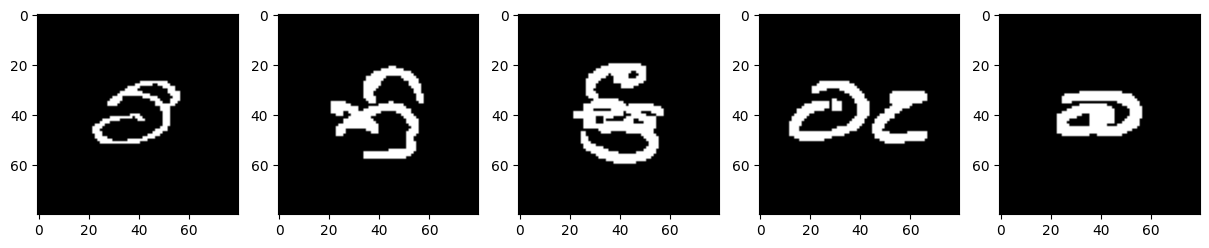

In [ ]:
np.random.seed(414121)

def display_random_images(image_array):
  plt.figure(figsize=(15, 3))
  for i in range(5):
    idx = np.random.randint(0, image_array.shape[0])
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_array[idx], cmap='gray')
  plt.show()

display_random_images(train_data)

## Tensorflow

### Model Creation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras import callbacks
from tensorflow.keras.regularizers import l2

In [ ]:
num_classes = 454

### From tutorial

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))

### From sinhala cnn

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

### From tamil recognition - best so far

In [ ]:
# l2_reg = l2(0.001)
# l2_reg = l2(0.0001)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(80, 80, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),


    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(num_classes)
])

In [ ]:
from tensorflow.keras.utils import plot_model

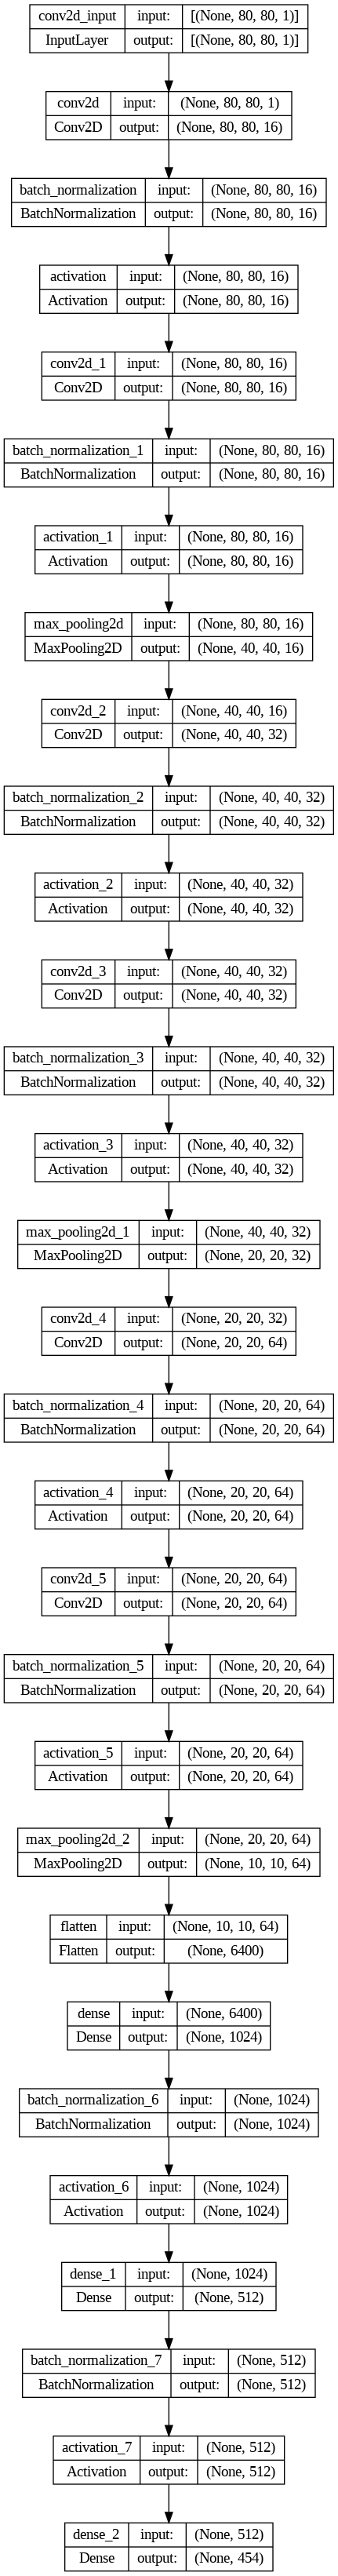

In [ ]:
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

### One hot encoding

In [ ]:
print("Train data shape:", train_data.shape)
print("Train labels shape:", training_labels.shape)
print("Test data shape:", testing_data.shape)
print("Test labels shape:", testing_labels.shape)

Train data shape: (87141, 80, 80, 1)
Train labels shape: (87141,)
Test data shape: (10896, 80, 80, 1)
Test labels shape: (10896,)


In [ ]:
training_labels_adjusted = training_labels - 1
testing_labels_adjusted = testing_labels - 1
training_labels_one_hot = tf.keras.utils.to_categorical(training_labels_adjusted, num_classes)
testing_labels_one_hot = tf.keras.utils.to_categorical(testing_labels_adjusted, num_classes)
del training_labels_adjusted
del testing_labels_adjusted

### Keras tuner search


In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

Using TensorFlow backend


In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Flatten())
  # hp_units = hp.Int('units', min_value=32, max_value=128, step=16)
  # model.add(Dense(units=hp_units, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-0, 1e-1, 1e-2])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=4,
                     directory='my_dir',
                     project_name='sinhala_char_recognition')

Reloading Tuner from my_dir/sinhala_char_recognition/tuner0.json


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_data, training_labels_one_hot, epochs=50, validation_data=(testing_data, testing_labels_one_hot), callbacks=[stop_early])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

### Compile

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="max", patience=10,
                                        restore_best_weights=True)

history = model.fit(train_data, training_labels_one_hot, epochs=100,
                    callbacks=[earlystopping],
                    validation_data=(testing_data, testing_labels_one_hot))

Epoch 1/100
2724/2724 [==============================] - 72s 19ms/step - loss: 1.8292 - accuracy: 0.5567 - val_loss: 0.9856 - val_accuracy: 0.7243
Epoch 2/100
2724/2724 [==============================] - 50s 18ms/step - loss: 0.5357 - accuracy: 0.8434 - val_loss: 0.5880 - val_accuracy: 0.8371
Epoch 3/100
2724/2724 [==============================] - 50s 18ms/step - loss: 0.2869 - accuracy: 0.9137 - val_loss: 0.4271 - val_accuracy: 0.8918
Epoch 4/100
2724/2724 [==============================] - 54s 20ms/step - loss: 0.1877 - accuracy: 0.9417 - val_loss: 0.3317 - val_accuracy: 0.9189
Epoch 5/100
2724/2724 [==============================] - 50s 18ms/step - loss: 0.1356 - accuracy: 0.9577 - val_loss: 0.3686 - val_accuracy: 0.9183
Epoch 6/100
2724/2724 [==============================] - 50s 18ms/step - loss: 0.1075 - accuracy: 0.9660 - val_loss: 0.3542 - val_accuracy: 0.9298
Epoch 7/100
2724/2724 [==============================] - 49s 18ms/step - loss: 0.0897 - accuracy: 0.9719 - val_loss: 0

### Save Model

In [ ]:
%cd /content/drive/MyDrive/Capstone

/content/drive/MyDrive/Capstone


In [ ]:
%mkdir model9nothin

In [ ]:
%cd /content/drive/MyDrive/Capstone/model9nothin

/content/drive/MyDrive/Capstone/model9nothin


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weights.h5")

In [ ]:
x = np.expand_dims(train_data[6700], axis=0)
pred1 = model.predict(x)
print(np.argmax(pred1))

1/1 [==============================] - 0s 359ms/step
163


### Load Up Model

In [ ]:
%cd /content/drive/MyDrive/Capstone/model9nothin/

/content/drive/MyDrive/Capstone/model9nothin


In [ ]:
with open("model.json", "r") as json_file:
    model_json = json_file.read()
model = keras.models.model_from_json(model_json)

model.load_weights("model_weights.h5")

In [ ]:
model.summary()

### Analytics

341/341 - 2s - loss: 0.3401 - accuracy: 0.9622 - 2s/epoch - 5ms/step


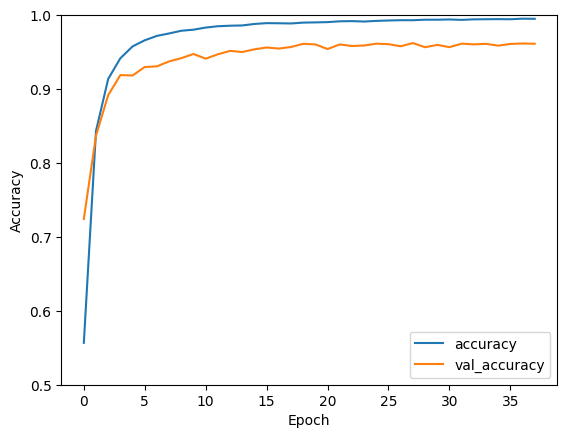

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testing_data,  testing_labels_one_hot, verbose=2)

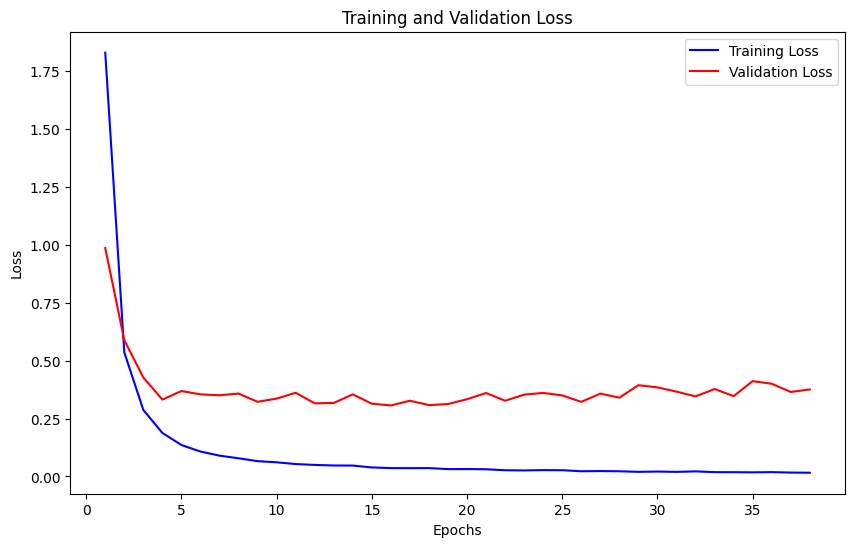

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(testing_data)
pred = np.argmax(pred,axis=1)
pred += 1

341/341 [==============================] - 1s 4ms/step


In [ ]:
from sklearn import metrics

In [ ]:
score = metrics.accuracy_score(testing_labels, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9621879588839941


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

def evaluate_model(model, test_data, test_labels):
    _, accuracy = model.evaluate(test_data, test_labels)
    return accuracy

train_accuracy = evaluate_model(model, train_data, training_labels_one_hot)
print(f"Training Accuracy: {train_accuracy}")
test_accuracy = evaluate_model(model, testing_data, testing_labels_one_hot)
print(f"Testing Accuracy: {test_accuracy}")

2724/2724 [==============================] - 24s 6ms/step - loss: 0.0057 - accuracy: 0.9982
Training Accuracy: 0.9982442259788513
341/341 [==============================] - 3s 8ms/step - loss: 0.3401 - accuracy: 0.9622
Testing Accuracy: 0.9621879458427429


In [ ]:
precision = precision_score(testing_labels, pred, average='weighted')
recall = recall_score(testing_labels, pred, average='weighted')
f1 = f1_score(testing_labels, pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9645887163339264
Recall: 0.9621879588839941
F1 Score: 0.9622116935774357


In [ ]:
raw_logits = model.predict(testing_data)
predicted_probs = np.exp(raw_logits - np.max(raw_logits, axis=1, keepdims=True))
predicted_probs /= predicted_probs.sum(axis=1, keepdims=True)
log_loss_score = metrics.log_loss(testing_labels, predicted_probs)
print("Log loss score: {}".format(log_loss_score))

341/341 [==============================] - 2s 5ms/step
Log loss score: 0.2990560139910804


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(testing_labels, pred)
print(report)

              precision    recall  f1-score   support

           1       0.95      0.88      0.91        24
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        24
           4       1.00      0.96      0.98        24
           5       1.00      1.00      1.00        24
           6       1.00      0.88      0.93        24
           7       0.96      1.00      0.98        24
           8       0.96      0.92      0.94        24
           9       1.00      1.00      1.00        24
          10       0.92      1.00      0.96        24
          11       0.92      1.00      0.96        24
          12       1.00      0.92      0.96        24
          13       1.00      1.00      1.00        24
          14       1.00      0.96      0.98        24
          15       0.95      0.83      0.89        24
          16       1.00      0.92      0.96        24
          17       1.00      1.00      1.00        24
          18       0.96    